MNIST digit classification

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [36]:
len(X_train)

60000

In [37]:
len(X_test)

10000

In [38]:
X_train[0].shape

(28, 28)

In [39]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

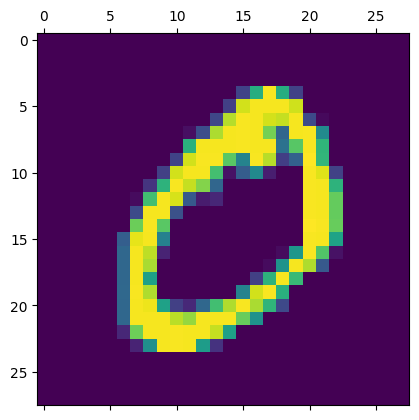

In [40]:
plt.matshow(X_train[1])

In [41]:
y_train[1]

0

In [42]:
X_train=X_train/255
X_test=X_test/255

In [43]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
X_train_flatten = X_train.reshape(len(X_train),28*28)

In [45]:
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [46]:
X_test_flatten.shape

(10000, 784)

In [47]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4709 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9250


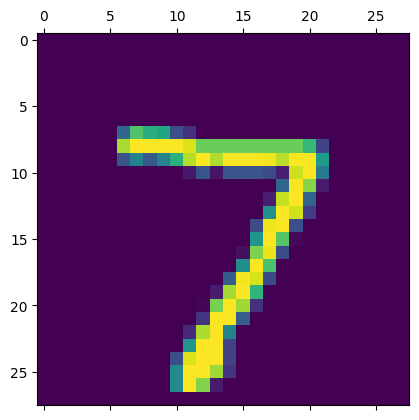

In [56]:
plt.matshow(X_test[0])

In [48]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2710 - accuracy: 0.9244


[0.2710127830505371, 0.9243999719619751]

In [51]:
y_predict=model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [52]:
y_predict[0]

array([1.8773008e-02, 2.4257457e-07, 3.3174232e-02, 9.4788134e-01,
       1.7754151e-03, 8.6640157e-02, 1.7063900e-06, 9.9979979e-01,
       7.4796572e-02, 5.9282738e-01], dtype=float32)

In [55]:
np.argmax(y_predict[0])

7

In [58]:
y_predicted_labels=[np.argmax(i) for i in y_predict]

In [60]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

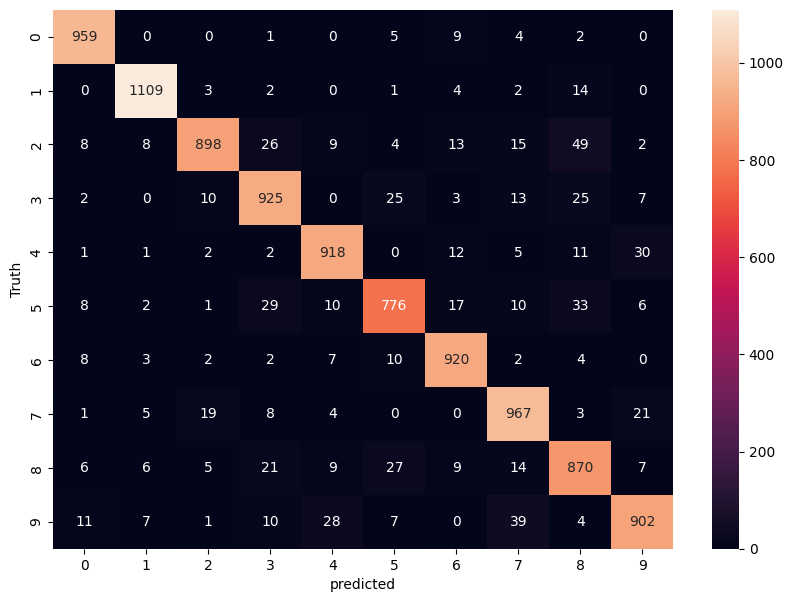

In [63]:
plt.figure (figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [65]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')

])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1214 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0851 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0646 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9839


In [66]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0809 - accuracy: 0.9749


[0.08091653883457184, 0.9749000072479248]

In [67]:
y_predict=model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [68]:
y_predict[0]

array([3.5804342e-02, 1.7432061e-03, 5.9277660e-01, 8.5557544e-01,
       5.4154567e-05, 5.7058197e-02, 2.0962585e-08, 9.9999869e-01,
       3.3790058e-01, 8.9843756e-01], dtype=float32)

In [69]:
np.argmax(y_predict[0])

7

In [70]:
y_predicted_labels=[np.argmax(i) for i in y_predict]

In [71]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

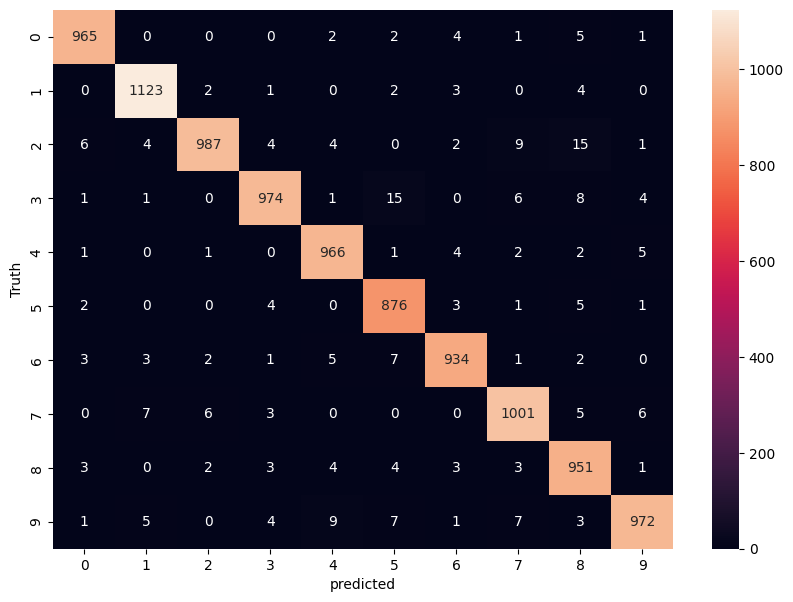

In [72]:
plt.figure (figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [78]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')

])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2710 - accuracy: 0.9235
Epoch 2/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1235 - accuracy: 0.9627
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9739
Epoch 4/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0659 - accuracy: 0.9798
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9843
Epoch 6/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0420 - accuracy: 0.9868
Epoch 7/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0347 - accuracy: 0.9892
Epoch 8/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9920
Epoch 9/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9923


In [79]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9761


[0.0870710238814354, 0.9761000275611877]

In [ ]:
git push